#**Data Collection**

In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"hidayatmauluddin","key":"95091e16af87ea58d8732241416bf178"}'}

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns

In [ ]:
!mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download -d varintornsithisint/bangkok-housing-condo-apartment-prices

  0% 0.00/1.69k [00:00<?, ?B/s]
100% 1.69k/1.69k [00:00<00:00, 4.76MB/s]


In [ ]:
! mkdir bangkok-housing-condo-apartment-prices

In [ ]:
! unzip bangkok-housing-condo-apartment-prices.zip -d bangkok-housing-condo-apartment-prices

Archive:  bangkok-housing-condo-apartment-prices.zip
  inflating: bangkok-housing-condo-apartment-prices/Bangkok Housing Condo Apartment Prices.csv  


In [ ]:
properties = pd.read_csv('bangkok-housing-condo-apartment-prices/Bangkok Housing Condo Apartment Prices.csv')
properties

,Property Type,Location,Area (sq. ft.),Bedrooms,Bathrooms,Price (THB)
0,Condo,Sukhumvit,700,1,1,2000000
1,House,Ladprao,1500,3,2,5000000
2,Apartment,Siam,900,2,1,3500000
3,Condo,Sathorn,1200,2,2,4500000
4,House,Ratchada,1800,4,3,8000000
...,...,...,...,...,...,...
558,House,Ekkamai,400,5,4,6000000
559,Apartment,Sukhumvit,20,1,1,500000
560,Condo,Ladprao,20,2,1,800000
561,House,Siam,20,3,2,1600000


#**Data Understanding**

**Variabel-variabel pada dataset sebagai berikut:**

- Property Type: Tipe Properti seperti Rumah, Apartemen, dan lain lain.
- Location: Lokasi properti
- Area (sq. ft.): Ukuran Area
- Bedroom: Jumlah kamar tidur
- Bathroom: Jumlah kamar mandi
- Price: harga dalam mata uang Thailand (THB) atau bath dan merupakan fitur target

In [ ]:
properties.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 563 entries, 0 to 562
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Property Type   563 non-null    object
 1   Location        563 non-null    object
 2   Area (sq. ft.)  563 non-null    int64 
 3   Bedrooms        563 non-null    int64 
 4   Bathrooms       563 non-null    int64 
 5   Price (THB)     563 non-null    int64 
dtypes: int64(4), object(2)
memory usage: 26.5+ KB


In [ ]:
properties.nunique()

Property Type      3
Location          10
Area (sq. ft.)    35
Bedrooms           5
Bathrooms          4
Price (THB)       73
dtype: int64

In [ ]:
properties.describe()

,Area (sq. ft.),Bedrooms,Bathrooms,Price (THB)
count,563.000000,563.000000,563.000000,5.630000e+02
mean,931.758437,2.317940,1.817052,3.991119e+06
std,540.198921,1.241404,0.924322,2.508461e+06
min,10.000000,1.000000,1.000000,3.000000e+05
25%,550.000000,1.000000,1.000000,2.200000e+06
50%,850.000000,2.000000,2.000000,3.300000e+06
75%,1250.000000,3.000000,2.000000,5.000000e+06
max,2200.000000,5.000000,4.000000,1.000000e+07


In [ ]:
properties.isnull().sum()

Property Type     0
Location          0
Area (sq. ft.)    0
Bedrooms          0
Bathrooms         0
Price (THB)       0
dtype: int64

##**EDA - Handling Outliers:**

<Axes: xlabel='Area (sq. ft.)'>

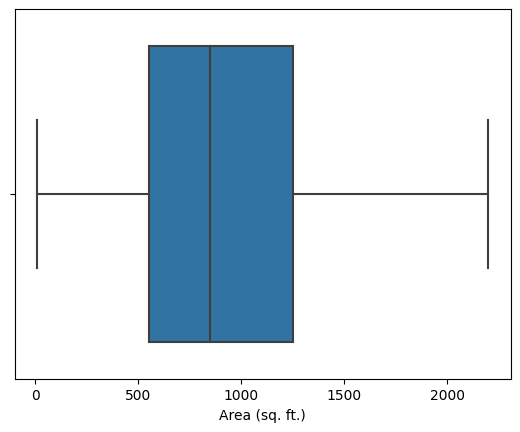

In [ ]:
sns.boxplot(x=properties['Area (sq. ft.)'])

<Axes: xlabel='Bedrooms'>

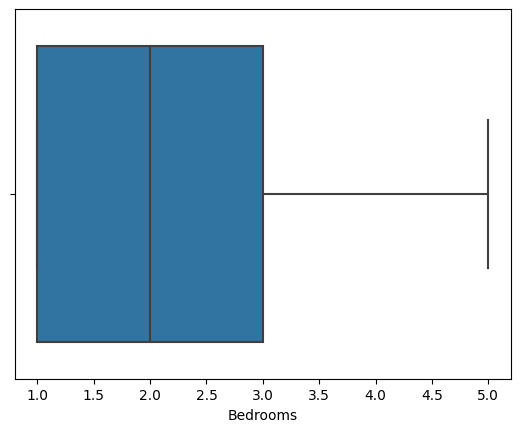

In [ ]:
sns.boxplot(x=properties['Bedrooms'])

<Axes: xlabel='Bathrooms'>

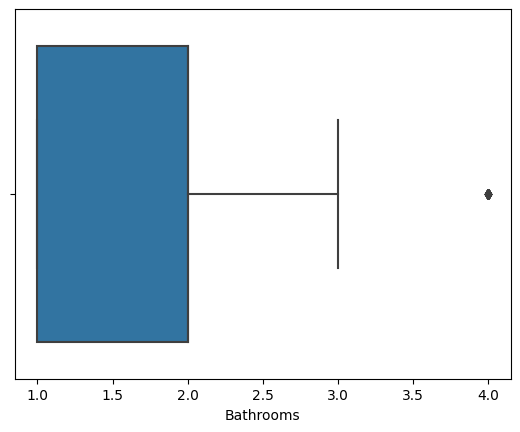

In [ ]:
sns.boxplot(x=properties['Bathrooms'])

<Axes: xlabel='Price (THB)'>

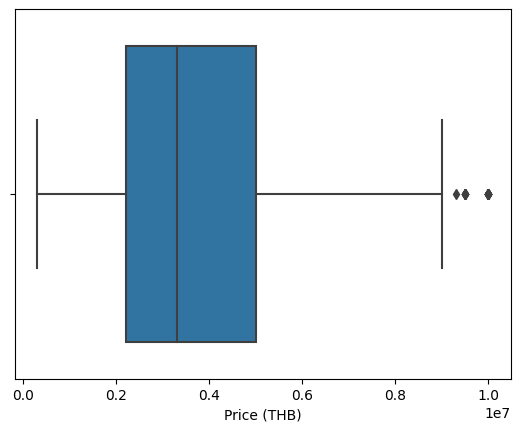

In [ ]:
sns.boxplot(x=properties['Price (THB)'])

In [ ]:
Q1 = properties.quantile(0.25)
Q3 = properties.quantile(0.75)
IQR=Q3-Q1
diamonds=properties[~((properties<(Q1-1.5*IQR))|(properties>(Q3+1.5*IQR))).any(axis=1)]
 
# Cek ukuran dataset setelah kita drop outliers
properties.shape

<ipython-input-19-67d460359c98>:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = properties.quantile(0.25)
<ipython-input-19-67d460359c98>:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = properties.quantile(0.75)
<ipython-input-19-67d460359c98>:4: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  diamonds=properties[~((properties<(Q1-1.5*IQR))|(properties>(Q3+1.5*IQR))).any(axis=1)]


(563, 6)

##**EDA - Univariate Analysis**

In [ ]:
numerical_features = properties.select_dtypes(include=np.number).columns.tolist()
categorical_features = properties.select_dtypes(include=["object"]).columns.tolist()

In [ ]:
numerical_features

['Area (sq. ft.)', 'Bedrooms', 'Bathrooms', 'Price (THB)']

In [ ]:
categorical_features

['Property Type', 'Location']

           jumlah sampel  persentase
Condo                198        35.2
House                190        33.7
Apartment            175        31.1


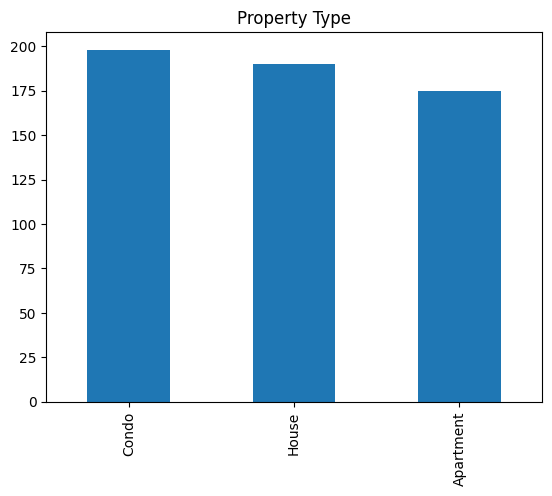

In [ ]:
feature = categorical_features[0]
count = properties[feature].value_counts()
percent = 100*properties[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

             jumlah sampel  persentase
Ladprao                 63        11.2
Siam                    62        11.0
Sukhumvit               61        10.8
Silom                   58        10.3
Phrom Phong             55         9.8
Thonglor                55         9.8
Ari                     55         9.8
Ekkamai                 55         9.8
Sathorn                 52         9.2
Ratchada                47         8.3


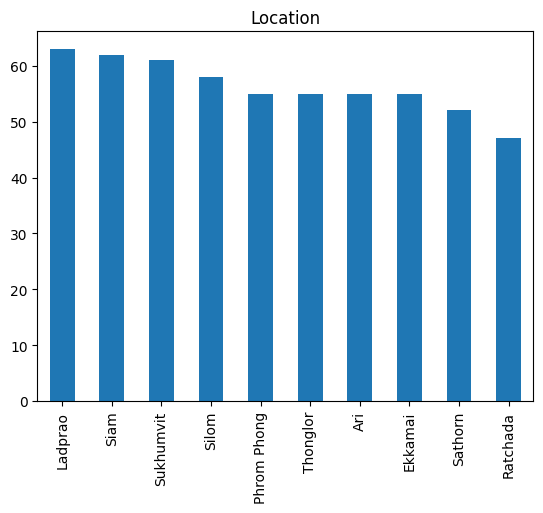

In [ ]:
feature = categorical_features[1]
count = properties[feature].value_counts()
percent = 100*properties[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

In [ ]:
properties

,Property Type,Location,Area (sq. ft.),Bedrooms,Bathrooms,Price (THB)
0,Condo,Sukhumvit,700,1,1,2000000
1,House,Ladprao,1500,3,2,5000000
2,Apartment,Siam,900,2,1,3500000
3,Condo,Sathorn,1200,2,2,4500000
4,House,Ratchada,1800,4,3,8000000
...,...,...,...,...,...,...
558,House,Ekkamai,400,5,4,6000000
559,Apartment,Sukhumvit,20,1,1,500000
560,Condo,Ladprao,20,2,1,800000
561,House,Siam,20,3,2,1600000


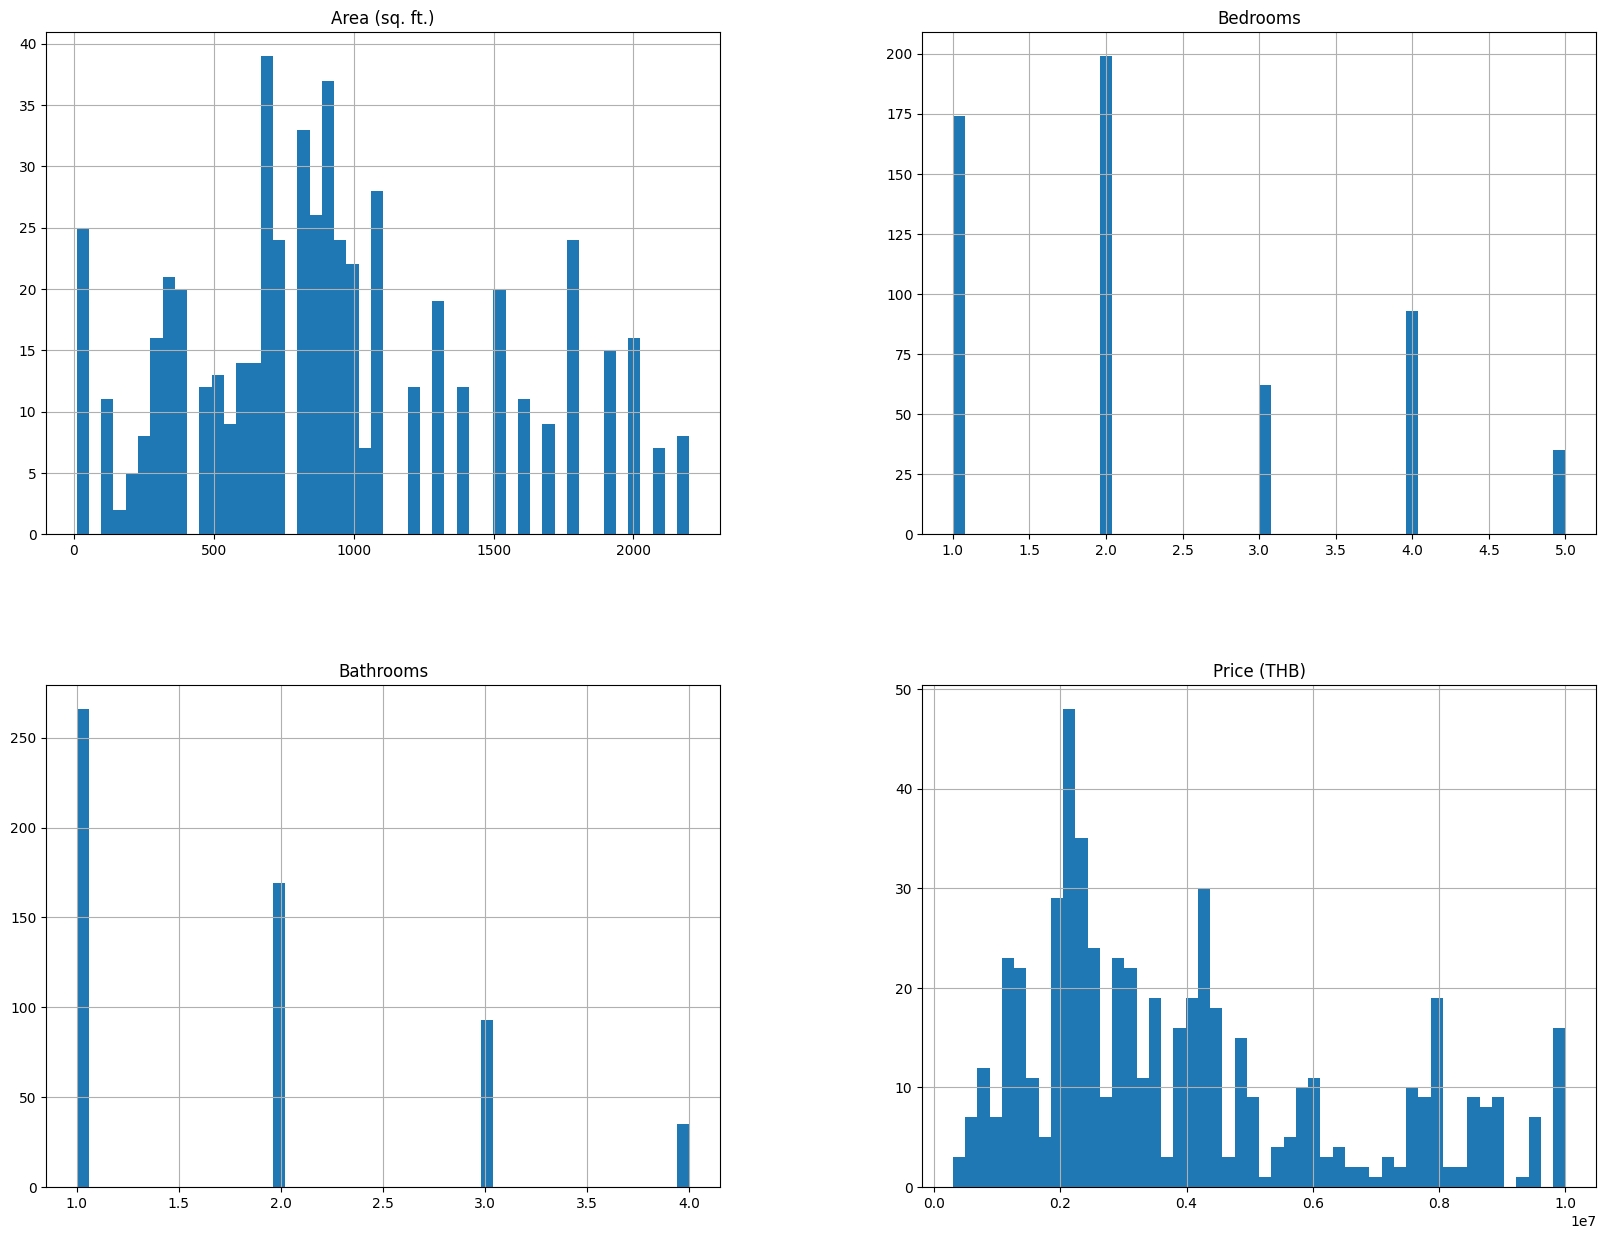

In [ ]:
properties.hist(bins=50, figsize=(20,15))
plt.show()

#**EDA - Multivariate Analysis**

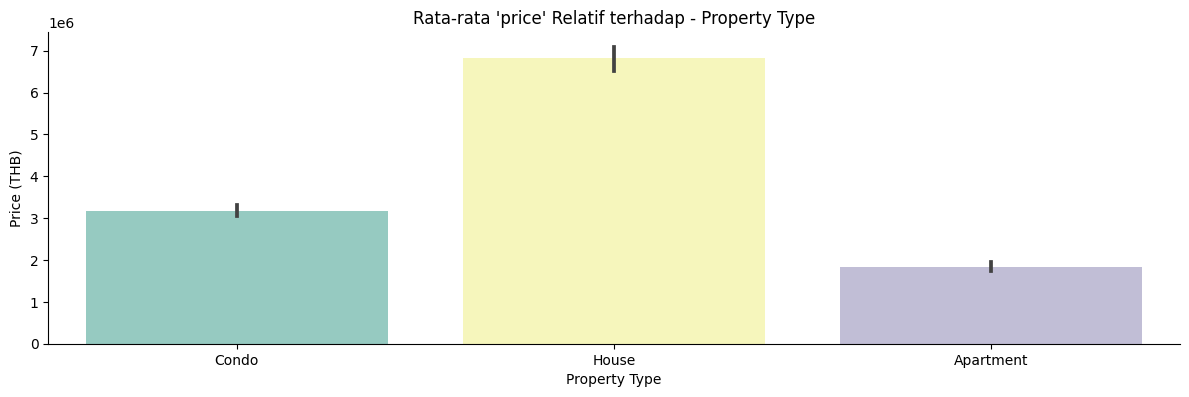

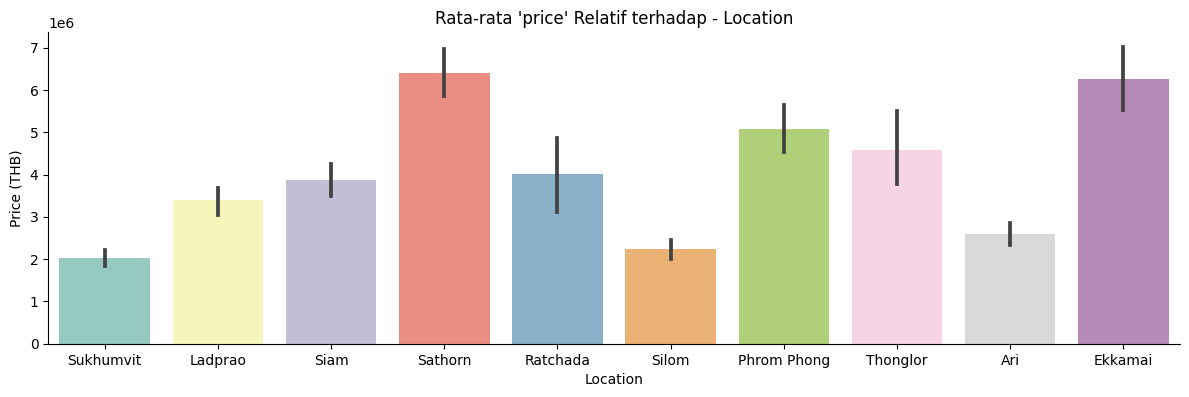

In [ ]:
cat_features = properties.select_dtypes(include='object').columns.to_list()
 
for col in cat_features:
  sns.catplot(x=col, y="Price (THB)", kind="bar", dodge=False, height = 4, aspect = 3,  data=properties, palette="Set3")
  plt.title("Rata-rata 'price' Relatif terhadap - {}".format(col))

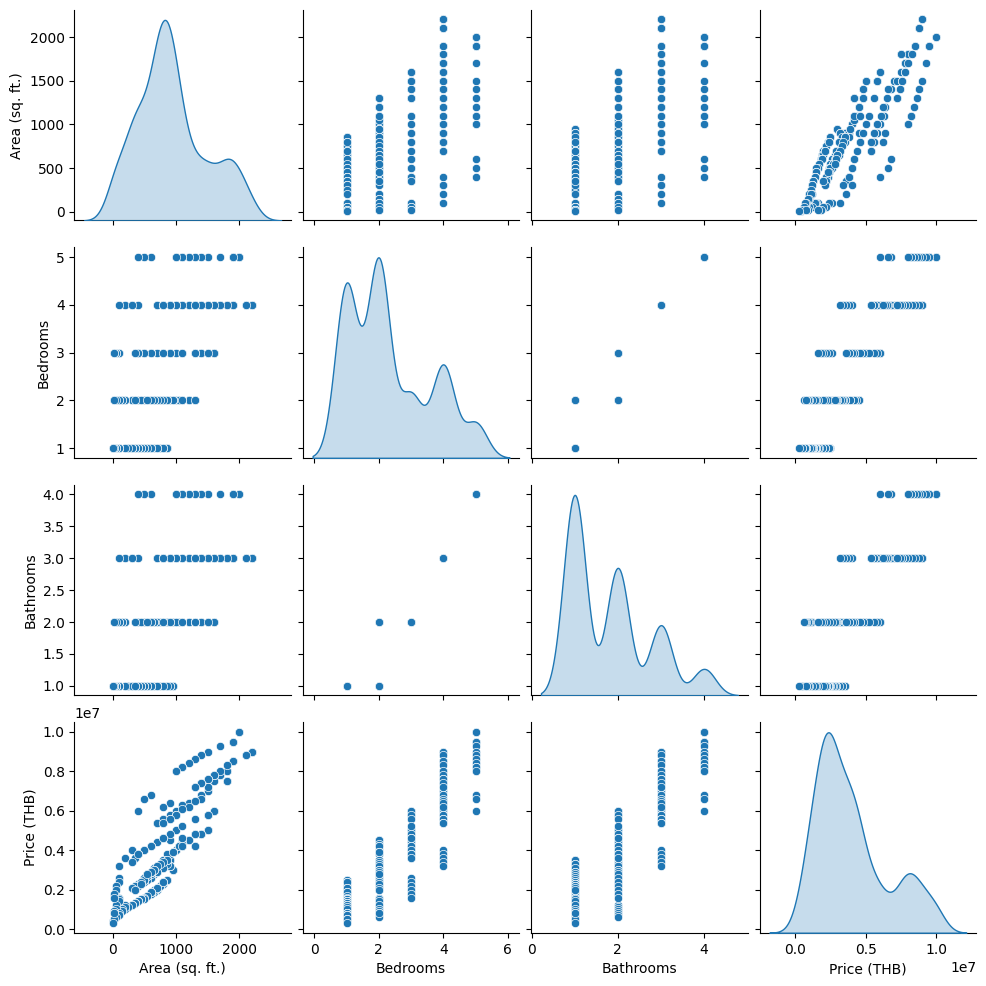

In [ ]:
# Mengamati hubungan antar fitur numerik dengan fungsi pairplot()
sns.pairplot(properties, diag_kind = 'kde')

<ipython-input-29-8ad02bfaa9a6>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = properties.corr().round(2)


Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik ')

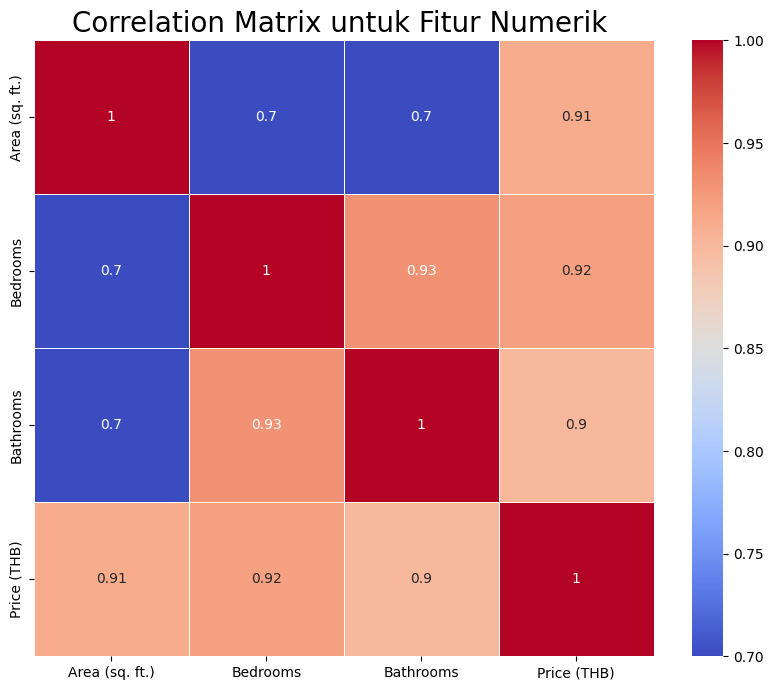

In [ ]:
plt.figure(figsize=(10, 8))
correlation_matrix = properties.corr().round(2)
 
# Untuk menge-print nilai di dalam kotak, gunakan parameter anot=True
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix untuk Fitur Numerik ", size=20)

#**Data Preparation**

In [ ]:
from sklearn.preprocessing import  OneHotEncoder
properties = pd.concat([properties, pd.get_dummies(properties['Property Type'], prefix='Property Type')],axis=1)
properties = pd.concat([properties, pd.get_dummies(properties['Location'], prefix='Location')],axis=1)
properties.drop(['Property Type','Location'], axis=1, inplace=True)
properties.head()

,Area (sq. ft.),Bedrooms,Bathrooms,Price (THB),Property Type_Apartment,Property Type_Condo,Property Type_House,Location_Ari,Location_Ekkamai,Location_Ladprao,Location_Phrom Phong,Location_Ratchada,Location_Sathorn,Location_Siam,Location_Silom,Location_Sukhumvit,Location_Thonglor
0,700,1,1,2000000,0,1,0,0,0,0,0,0,0,0,0,1,0
1,1500,3,2,5000000,0,0,1,0,0,1,0,0,0,0,0,0,0
2,900,2,1,3500000,1,0,0,0,0,0,0,0,0,1,0,0,0
3,1200,2,2,4500000,0,1,0,0,0,0,0,0,1,0,0,0,0
4,1800,4,3,8000000,0,0,1,0,0,0,0,1,0,0,0,0,0


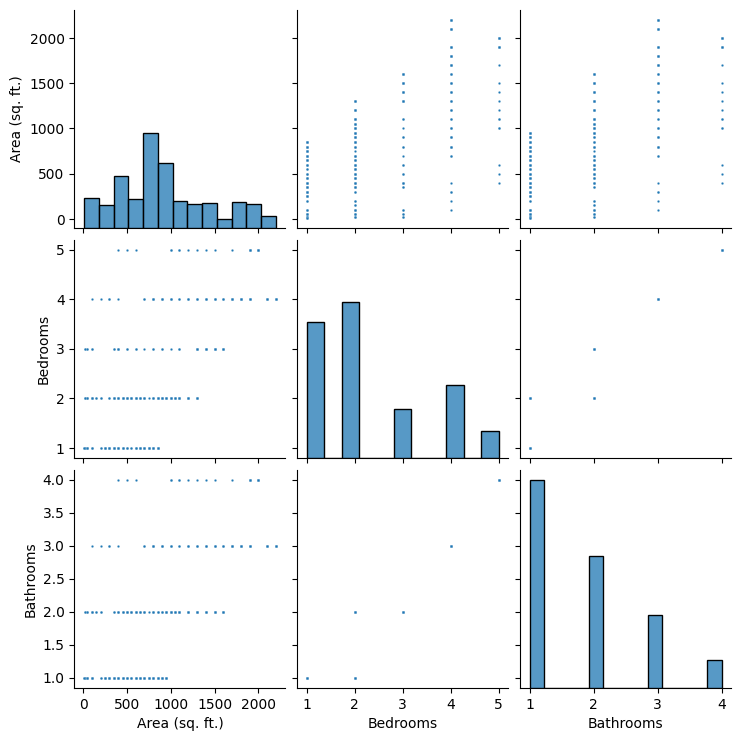

In [ ]:
sns.pairplot(properties[['Area (sq. ft.)','Bedrooms', 'Bathrooms']], plot_kws={"s": 3});

In [ ]:
from sklearn.decomposition import PCA
 
pca = PCA(n_components=3, random_state=123)
pca.fit(properties[['Area (sq. ft.)','Bedrooms', 'Bathrooms']])
princ_comp = pca.transform(properties[['Area (sq. ft.)','Bedrooms', 'Bathrooms']])

In [ ]:
pca.explained_variance_ratio_.round(3)

array([1., 0., 0.])

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=1, random_state=123)
pca.fit(properties[['Area (sq. ft.)','Bedrooms', 'Bathrooms']])
properties['dimension'] = pca.transform(properties.loc[:, ('Area (sq. ft.)','Bedrooms', 'Bathrooms')]).flatten()
properties.drop(['Area (sq. ft.)','Bedrooms', 'Bathrooms'], axis=1, inplace=True)
properties

,Price (THB),Property Type_Apartment,Property Type_Condo,Property Type_House,Location_Ari,Location_Ekkamai,Location_Ladprao,Location_Phrom Phong,Location_Ratchada,Location_Sathorn,Location_Siam,Location_Silom,Location_Sukhumvit,Location_Thonglor,dimension
0,2000000,0,1,0,0,0,0,0,0,0,0,0,1,0,-231.761079
1,5000000,0,0,1,0,0,1,0,0,0,0,0,0,0,568.241735
2,3500000,1,0,0,0,0,0,0,0,0,1,0,0,0,-31.759864
3,4500000,0,1,0,0,0,0,0,0,1,0,0,0,0,268.240723
4,8000000,0,0,1,0,0,0,0,1,0,0,0,0,0,868.243942
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558,6000000,0,0,1,0,1,0,0,0,0,0,0,0,0,-531.750407
559,500000,1,0,0,0,0,0,0,0,0,0,0,1,0,-911.759701
560,800000,0,1,0,0,0,1,0,0,0,0,0,0,0,-911.758081
561,1600000,0,0,1,0,0,0,0,0,0,1,0,0,0,-911.755266


In [ ]:
from sklearn.model_selection import train_test_split
 
X = properties.drop(["Price (THB)"],axis =1)
y = properties["Price (THB)"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 123)

In [ ]:
print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 563
Total # of sample in train dataset: 506
Total # of sample in test dataset: 57


In [ ]:
from sklearn.preprocessing import StandardScaler
numerical_features = ['dimension']
scaler = StandardScaler()
scaler.fit(X_train[numerical_features])
X_train[numerical_features] = scaler.transform(X_train.loc[:, numerical_features])
X_train[numerical_features].head()

,dimension
417,0.495125
199,0.495111
558,-0.967377
453,-1.150209
337,-0.601770


In [ ]:
X_train[numerical_features].describe().round(4)

,dimension
count,506.0000
mean,0.0000
std,1.0010
min,-1.6804
25%,-0.6932
50%,-0.1447
75%,0.6779
max,2.3232


#**Model Development**

In [ ]:
# Siapkan dataframe untuk analisis model
models = pd.DataFrame(index=['train_mse', 'test_mse'], 
                      columns=['KNN', 'RandomForest', 'Boosting'])

##**K-Nearest Neighbor**

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
 
knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(X_train, y_train)
 
models.loc['train_mse','knn'] = mean_squared_error(y_pred = knn.predict(X_train), y_true=y_train)

##**Random Forest**

In [ ]:
# Impor library yang dibutuhkan
from sklearn.ensemble import RandomForestRegressor
 
# buat model prediksi
RF = RandomForestRegressor(n_estimators=50, max_depth=16, random_state=55, n_jobs=-1)
RF.fit(X_train, y_train)
 
models.loc['train_mse','RandomForest'] = mean_squared_error(y_pred=RF.predict(X_train), y_true=y_train)

##**Boosting Algorithm**

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
 
boosting = AdaBoostRegressor(learning_rate=0.05, random_state=55)                             
boosting.fit(X_train, y_train)
models.loc['train_mse','Boosting'] = mean_squared_error(y_pred=boosting.predict(X_train), y_true=y_train)

#**Evaluasi Model**

In [ ]:
# Lakukan scaling terhadap fitur numerik pada X_test sehingga memiliki rata-rata=0 dan varians=1
X_test.loc[:, numerical_features] = scaler.transform(X_test[numerical_features])

In [ ]:
# Buat variabel mse yang isinya adalah dataframe nilai mse data train dan test pada masing-masing algoritma
mse = pd.DataFrame(columns=['train', 'test'], index=['KNN','RF','Boosting'])
 
# Buat dictionary untuk setiap algoritma yang digunakan
model_dict = {'KNN': knn, 'RF': RF, 'Boosting': boosting}
 
# Hitung Mean Squared Error masing-masing algoritma pada data train dan test
for name, model in model_dict.items():
    mse.loc[name, 'train'] = mean_squared_error(y_true=y_train, y_pred=model.predict(X_train))/1e3 
    mse.loc[name, 'test'] = mean_squared_error(y_true=y_test, y_pred=model.predict(X_test))/1e3
 
# Panggil mse
mse

,train,test
KNN,95578656.126482,179796491.22807
RF,4267541.389987,4398363.820663
Boosting,247100359.693098,107949250.476591


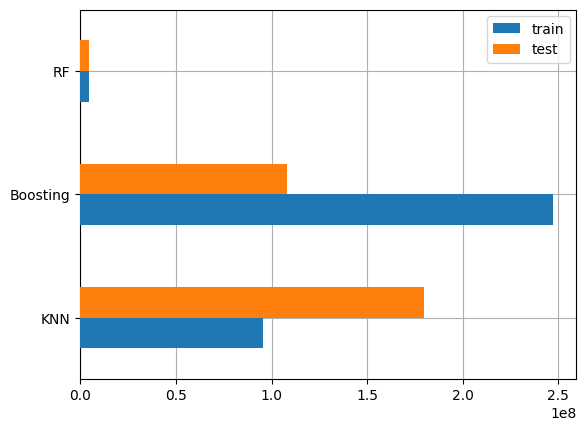

In [ ]:
fig, ax = plt.subplots()
mse.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

In [ ]:
prediksi = X_test.iloc[:1].copy()
pred_dict = {'y_true':y_test[:1]}
for name, model in model_dict.items():
    pred_dict['prediksi_'+name] = model.predict(prediksi).round(1)
 
pd.DataFrame(pred_dict)

,y_true,prediksi_KNN,prediksi_RF,prediksi_Boosting
267,7500000,8750000.0,7500000.0,8037037.0
